# Задание лабораторной работы

- Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
- Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
  - устранение пропусков в данных;
  - кодирование категориальных признаков;
  - нормализация числовых признаков.

# Выполнение работы

## Текстовое описание датасета

В качестве данных для анализа используется датасет `AutoRu1.csv`, представляющий собой таблицу, содержащую информацию о проданных автомобилях на сайте auto.ru за определенный период.

Описание столбцов в датасете:
- `bodyType` - тип кузова
- `brand` - марка
- `color` - цвет
- `complectation_dict` - комплектация
- `description` - описание
- `engineDisplacement` - объем двигателя
- `enginePower` - мощность автомобиля
- `equipment_dict` - оборудование
- `fuelType` - тип топлива
- `image` - количество фотографий
- `mileage` - пробег
- `modelDate` - год начала производства модели
- `model_info` - информация о модели
- `model_name` - название модели
- `name` - двигатель
- `numberOfDoors` - количество дверей
- `start_date` - публикация объявления
- `priceCurrency` - валюта
- `productionDate` - год выпуска
- `sell_id` - ID продавца
- `super_gen` - характеристики
- `vehicleConfiguration` - конфигурация
- `vehicleTransmission` - тип КПП
- `vendor` - страна произоводителя
- `Владельцы` - количество владельцев
- `Владение` - сколько владеет последний владелец
- `ПТС` - тип документа
- `Привод` - тип привода
- `Руль` - сторона руля
- `Состояние` - на ходу/не на ходу
- `Таможня` - растаможена/Не растаможена
- `price` - цена в рублях
- `price_EUR` - цена в евро
- `price_USD` - цена в долларах

## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline
sns.set(style="ticks")

## Подключение Google Диска для работы с Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Чтение данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/BMSTU/mmo/AutoRu1.csv')

In [ ]:
data.head()

,bodyType,brand,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,...,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,price,price_EUR,price_USD
0,Седан,AUDI,97948F,{'id': '0'},Машина на полном ходу\nСостояние хорошее\nС до...,2.3,133.0,{},бензин,5,...,3.0,NaN,ORIGINAL,передний,LEFT,True,True,106000.0,1161.0,1371.0
1,Седан,AUDI,CACECB,{'id': '0'},Продажа от официального дилера KIA - Компания ...,1.8,90.0,"{'condition': True, 'audiosystem-cd': True, 'f...",бензин,7,...,3.0,NaN,ORIGINAL,передний,LEFT,True,True,44000.0,482.0,569.0
2,Седан,AUDI,040001,{'id': '0'},Автомобиль продает Официальный дилер Hyundai. ...,2.6,150.0,"{'airbag-driver': True, 'isofix': True, 'elect...",бензин,11,...,3.0,NaN,DUPLICATE,передний,LEFT,True,True,167000.0,1829.0,2160.0
3,Седан,AUDI,DEA522,{'id': '0'},Продам машину в нормальном состоянии не гнилая...,2.0,101.0,{},бензин,7,...,3.0,NaN,DUPLICATE,передний,LEFT,True,True,135000.0,1478.0,1746.0
4,Седан,AUDI,0000CC,{'id': '0'},Комплектация:\n• Антиблокировочная система\n• ...,2.3,133.0,"{'alloy-wheel-disks': True, 'abs': True, 'whee...",бензин,15,...,2.0,NaN,ORIGINAL,передний,LEFT,True,True,130000.0,1424.0,1681.0


In [ ]:
data.shape

(77449, 34)

## Устранение пропусков

Определим столбцы, в которых наблюдаются пропуски данных:



In [ ]:
for column in data.columns:
    if (data[column].isnull().sum() != 0):
        print(column,':',data[column].isnull().sum())

bodyType : 2
description : 2667
enginePower : 2
modelDate : 2
name : 2
numberOfDoors : 2
priceCurrency : 297
super_gen : 2
vehicleConfiguration : 2
vehicleTransmission : 2
Владельцы : 15928
Владение : 57135
ПТС : 451
Привод : 2
price : 297
price_EUR : 297
price_USD : 297


В столбцах `bodyType`, `enginePower`, `modelDate`, `vehicleTransmission`, `Владельцы`, `ПТС`, `Привод`, `price`, `price_EUR`, `price_USD` существуют строки, содержащие пропуски данных, их необходимо удалить.

Удалим пропуски в `bodyType`:

In [ ]:
data.drop(data[data['bodyType'].isnull()].index, inplace=True)

Проверим снова:

In [ ]:
for column in data.columns:
    if (data[column].isnull().sum() != 0):
        print(column,':',data[column].isnull().sum())

description : 2667
priceCurrency : 297
Владельцы : 15928
Владение : 57133
ПТС : 451
price : 297
price_EUR : 297
price_USD : 297


Видим, что число столбцов сократилось. Из этого следует, что удаленные строки содеражали пропуски данных в нескольких столбцах. Удалим еще строки с пропусками:

In [ ]:
data.drop(data[data['Владельцы'].isnull()].index, inplace=True)
data.drop(data[data['ПТС'].isnull()].index, inplace=True)
data.drop(data[data['price'].isnull()].index, inplace=True)
data.drop(data[data['description'].isnull()].index, inplace=True)
data.drop(data[data['Владение'].isnull()].index, inplace=True)

Убедимся с помощью процентного соотношения, что пропусков в столбцах нет:

In [ ]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

bodyType - 0%
brand - 0%
color - 0%
complectation_dict - 0%
description - 0%
engineDisplacement - 0%
enginePower - 0%
equipment_dict - 0%
fuelType - 0%
image - 0%
mileage - 0%
modelDate - 0%
model_info - 0%
model_name - 0%
name - 0%
numberOfDoors - 0%
start_date - 0%
priceCurrency - 0%
productionDate - 0%
sell_id - 0%
super_gen - 0%
vehicleConfiguration - 0%
vehicleTransmission - 0%
vendor - 0%
Владельцы - 0%
Владение - 0%
ПТС - 0%
Привод - 0%
Руль - 0%
Состояние - 0%
Таможня - 0%
price - 0%
price_EUR - 0%
price_USD - 0%


## Кодирование категориальных признаков

### LabelEncoder

Выберем два категориальных признака - `bodyType` и `Привод`. Их закодируем с помощью LabelEncoder.

In [ ]:
data.bodyType.unique()

array(['Седан', 'Универсал 5 дв.', 'Хэтчбек 5 дв. Sportback',
       'Хэтчбек 3 дв.', 'Хэтчбек 5 дв.', 'Купе', 'Лифтбек Sportback',
       'Лифтбек', 'Седан Long', 'Внедорожник 5 дв.', 'Кабриолет',
       'Кабриолет Roadster', 'Седан 2 дв.', 'Седан Gran Coupe',
       'Компактвэн', 'Компактвэн Gran Tourer', 'Лифтбек Gran Turismo',
       'Хэтчбек 3 дв. Compact', 'Лифтбек Gran Coupe', 'Родстер',
       'Купе-хардтоп', 'Внедорожник 5 дв. ESV', 'Пикап Двойная кабина',
       'Внедорожник 3 дв.', 'Пикап Одинарная кабина', 'Минивэн',
       'Внедорожник 5 дв. EXT', 'Минивэн SWB', 'Минивэн Grand',
       'Компактвэн Grand', 'Минивэн Long', 'Минивэн XL', 'Микровэн Coach',
       'Хэтчбек 5 дв. Best', 'Хэтчбек 5 дв. SRT4', 'Купе SRT8',
       'Седан SRT', 'Пикап Двойная кабина Crew Cab',
       'Пикап Полуторная кабина Quad Cab',
       'Пикап Одинарная кабина Regular Cab', 'Внедорожник открытый WC-51',
       'Пикап Двойная кабина Raptor SuperCrew',
       'Пикап Двойная кабина Raptor CrewCab

In [ ]:
data.Привод.unique()

array(['передний', 'полный', 'задний'], dtype=object)

Закодируем их в числовые значения:

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
letype = LabelEncoder()
learrtype = letype.fit_transform(data["bodyType"])
data["bodyType"] = learrtype
data = data.astype({"bodyType":"int64"})

In [ ]:
lepriv = LabelEncoder()
learrpriv = lepriv.fit_transform(data["Привод"])
data["Привод"] = learrpriv
data = data.astype({"Привод":"int64"})

In [ ]:
data.bodyType.unique()

array([ 82,  93, 124, 110, 116,  37,  46,  42,  86,   3,  22,  24,  84,
        85,  26,  29,  44, 111,  43,  80,  40,   9,  64,   0,  73,  50,
        10,  62,  54,  30,  60,  63,  48, 117, 122,  39,  87,  65,  78,
        75,  21,  72,  71,  76,  25,  79,  66,  68,  35,  59, 107,  90,
        47,  81,  49,  11, 115,  88,  17,  16,  20, 119, 126,  14,   7,
        51, 104,  23, 112, 102,  97,   8,  12,  38, 114,  92, 113,  98,
        36,  89, 125,  34,  83, 123, 105,  19, 127,  18, 100, 101,  91,
       121,  45,  99,  61,  69,   5,   1,  74,  33, 103,  96, 120,  13,
        70,  67,  77,  95,  31,  32,  27,  94, 118,   6,  28, 108, 109,
       106,   2,  15,   4,  41,  55,  53,  52,  57,  58,  56])

In [ ]:
data.Привод.unique()

array([1, 2, 0])

### OneHotEncoder

Для признака `fuelType` проведем кодирование бинарными значениями с помощью OneHotEncoder.

In [ ]:
data.fuelType.unique()

array(['бензин', 'дизель', 'электро', 'гибрид', 'газ'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['fuelType']])
cat_enc_ohe

<19395x5 sparse matrix of type '<class 'numpy.float64'>'
	with 19395 stored elements in Compressed Sparse Row format>

In [ ]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.]])

In [ ]:
pd.get_dummies(data[['fuelType']]).head()

,fuelType_бензин,fuelType_газ,fuelType_гибрид,fuelType_дизель,fuelType_электро
10,True,False,False,False,False
14,True,False,False,False,False
16,True,False,False,False,False
18,True,False,False,False,False
19,True,False,False,False,False


In [ ]:
pd.get_dummies(data[['fuelType']], dummy_na=True).head()

,fuelType_бензин,fuelType_газ,fuelType_гибрид,fuelType_дизель,fuelType_электро,fuelType_nan
10,True,False,False,False,False,False
14,True,False,False,False,False,False
16,True,False,False,False,False,False
18,True,False,False,False,False,False
19,True,False,False,False,False,False


### CountEncoder

Для кодирования цвета `color` используем CountEncoder.

In [ ]:
data.color.unique()

array(['040001', '660099', 'FAFBFB', 'EE1D19', '007F00', '0000CC',
       'CACECB', '97948F', 'FFD600', '4A2197', 'C49648', 'FF8649',
       '22A0F8', '200204', 'DEA522', 'FFC0CB'], dtype=object)

In [ ]:
from category_encoders.count import CountEncoder as ce_CountEncoder

In [ ]:
ce_CountEncoder1 = ce_CountEncoder()
data_COUNT_ENC = ce_CountEncoder1.fit_transform(data['color'])

In [ ]:
data_COUNT_ENC.color.unique()

array([5241,  234, 3260, 1075,  626, 1877, 2701, 2213,  214,  131,  437,
        333,  729,  187,    6])

### FrequencyEncoder

Для признака `ПТС` используем FrequencyEncoder.

In [ ]:
data.ПТС.unique()

array(['ORIGINAL', 'DUPLICATE'], dtype=object)

In [ ]:
ce_CountEncoder2 = ce_CountEncoder(normalize=True)
data_FREQ_ENC = ce_CountEncoder2.fit_transform(data['ПТС'])

In [ ]:
data_FREQ_ENC.ПТС.unique()

array([0.86145914, 0.13854086])

## Нормализация числовых признаков

Нормализация числового признака предполагает что на основе существующего признака мы создаем новый признак, который в идеале имеет нормальное распределение.

In [ ]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

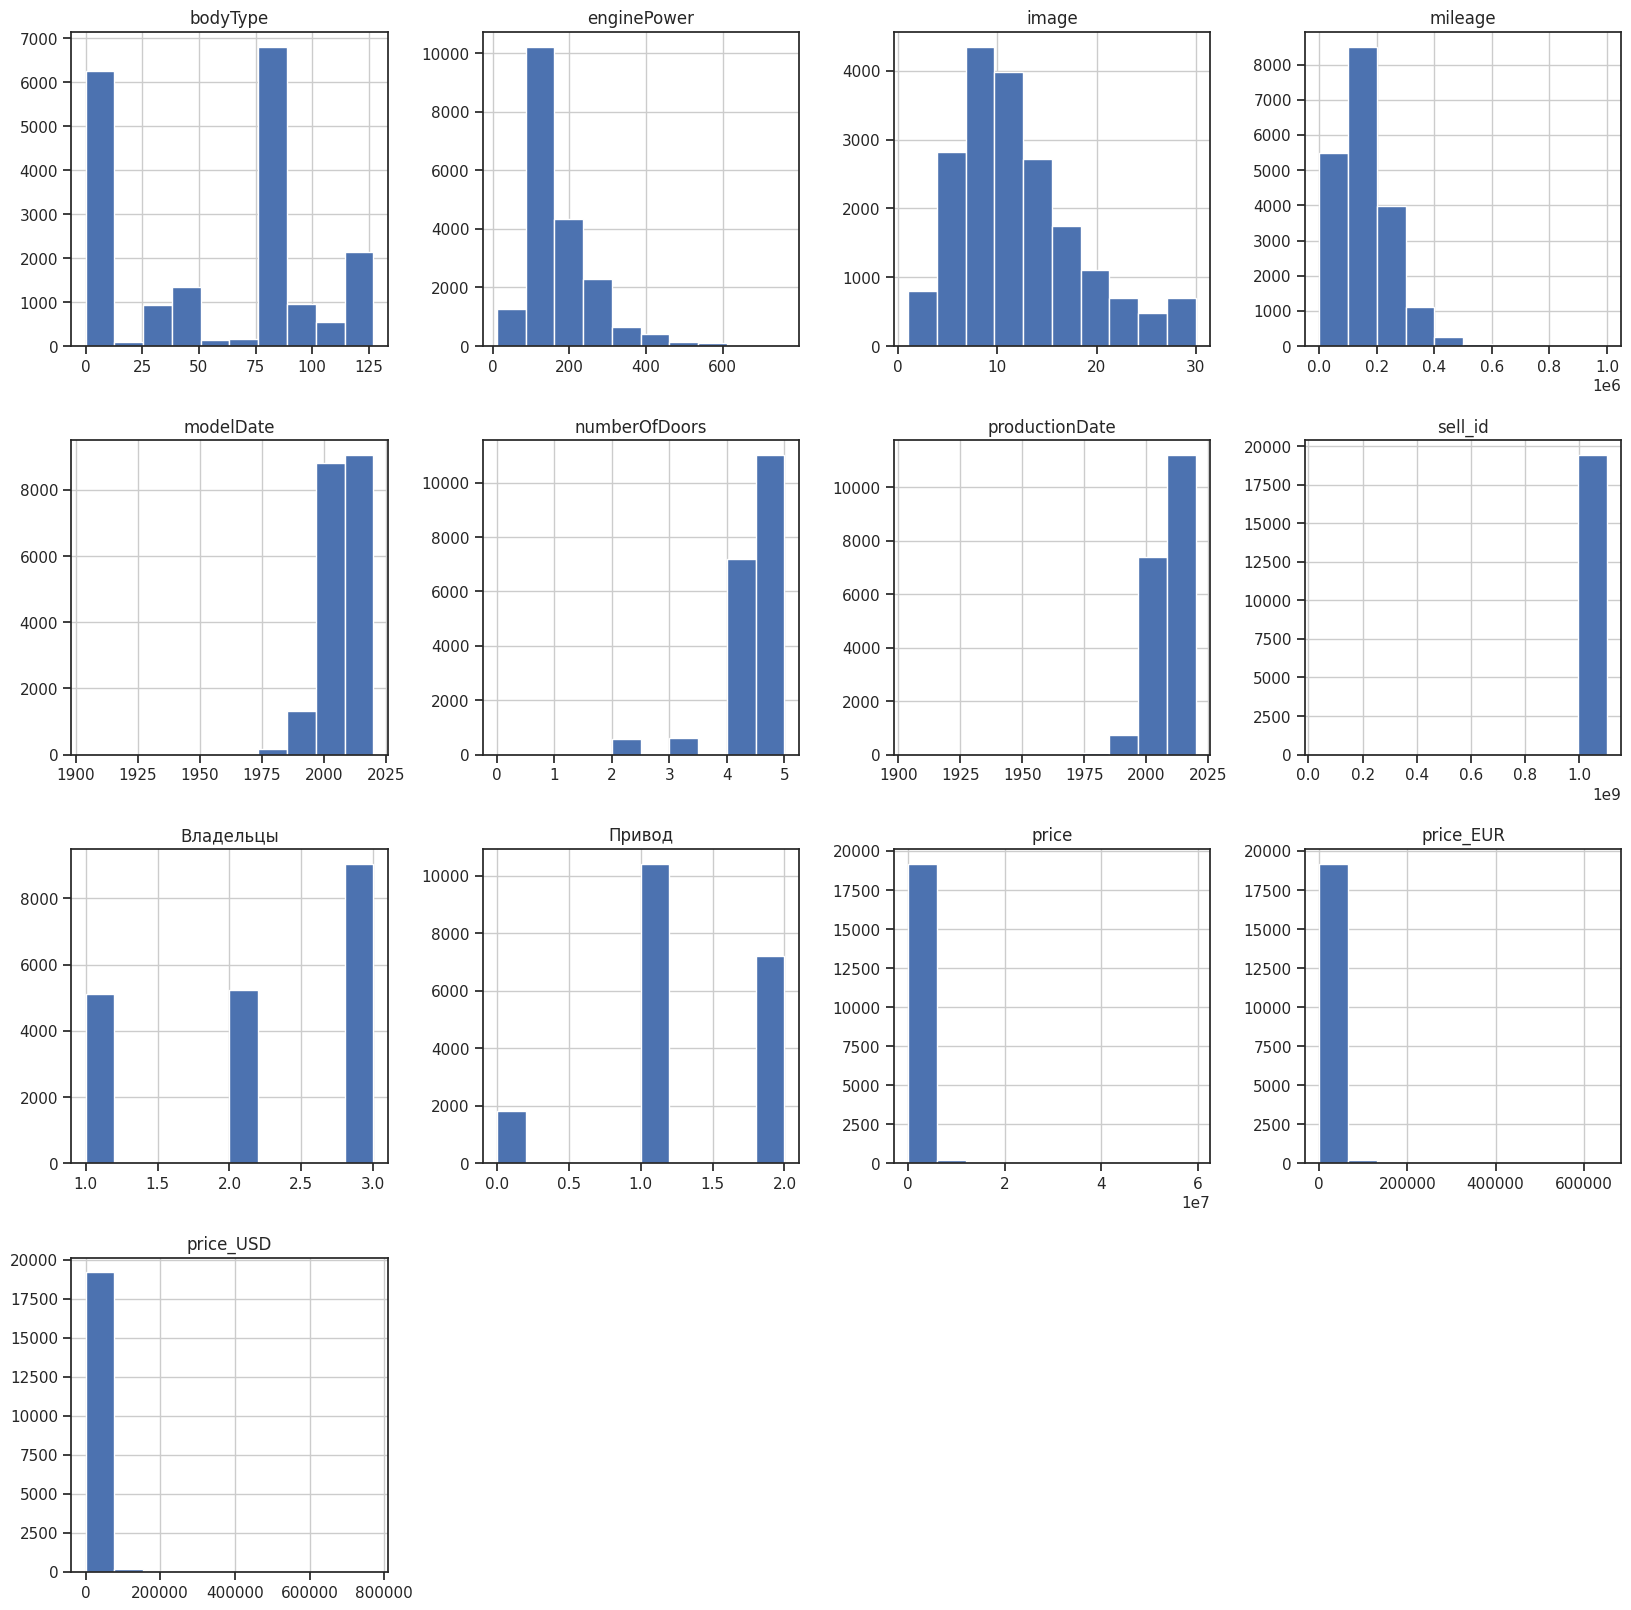

In [ ]:
data.hist(figsize=(20,20))
plt.show()

### Исходное распределение

Исходное распределение для признака числового признака `enginePower`:

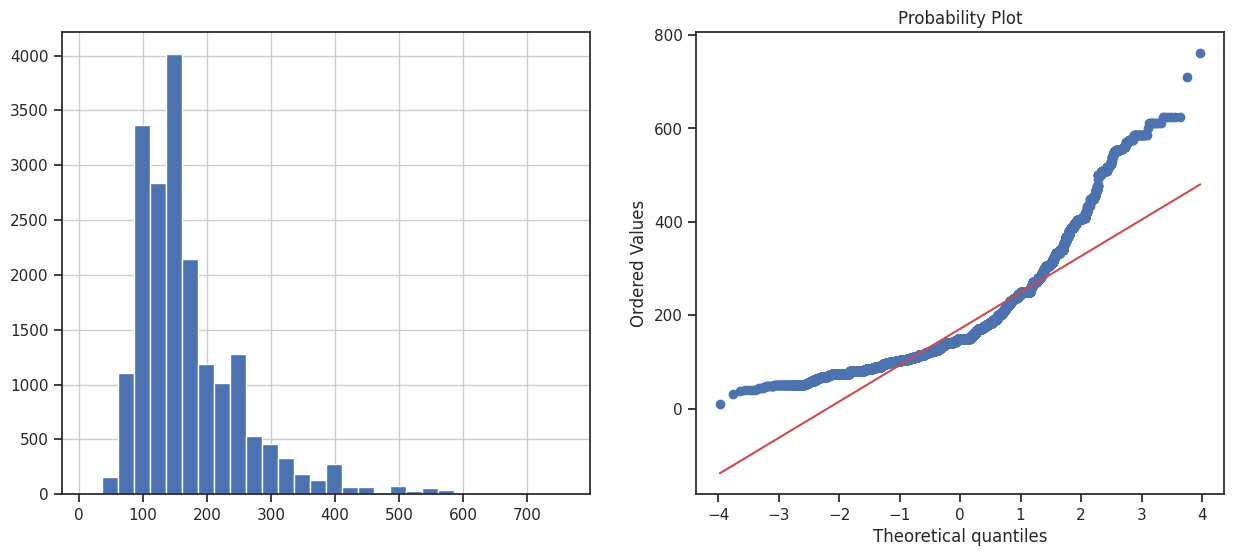

In [ ]:
diagnostic_plots(data, 'enginePower')

### Логарифмическое преобразование

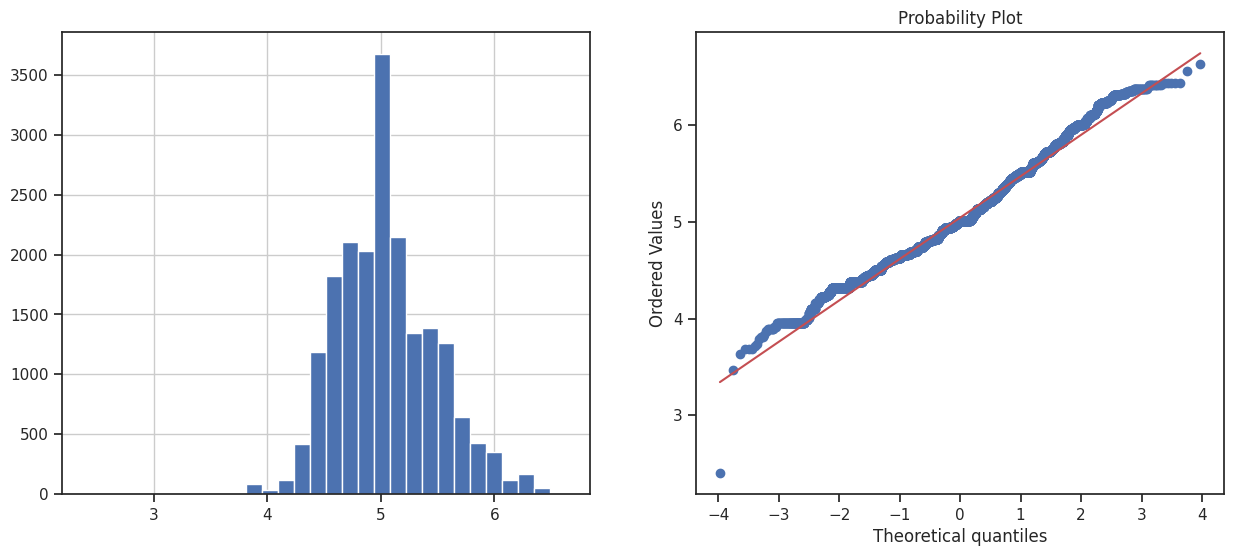

In [ ]:
data['enginePower_log'] = np.log(data['enginePower'])
diagnostic_plots(data, 'enginePower_log')

### Обратное преобразование

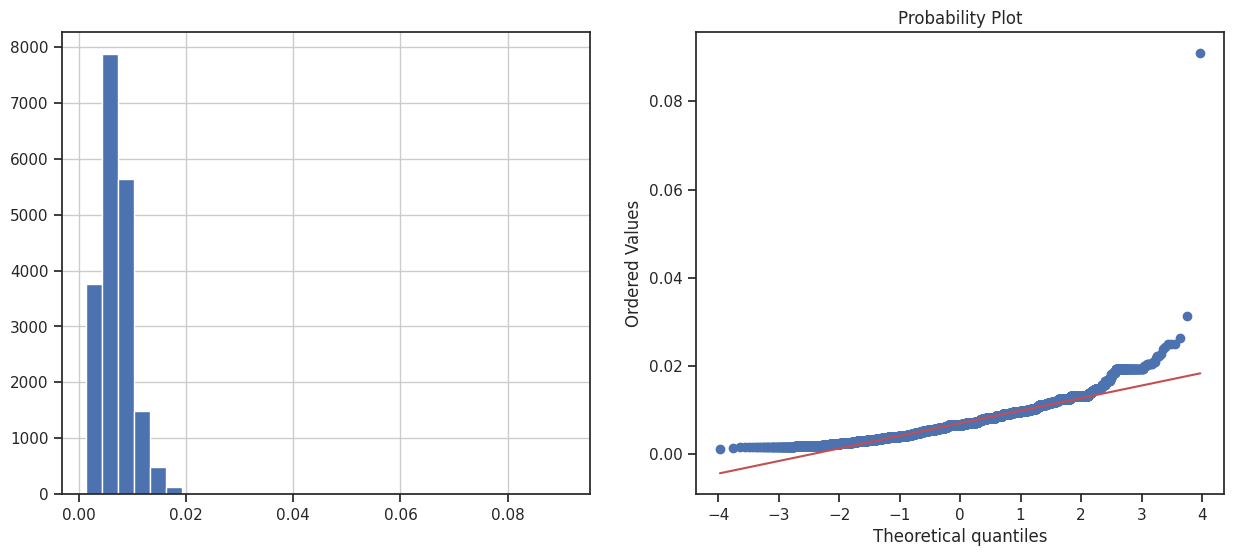

In [ ]:
data['enginePower_reciprocal'] = 1 / (data['enginePower'])
diagnostic_plots(data, 'enginePower_reciprocal')

### Преобразование с использованием квадратного корня

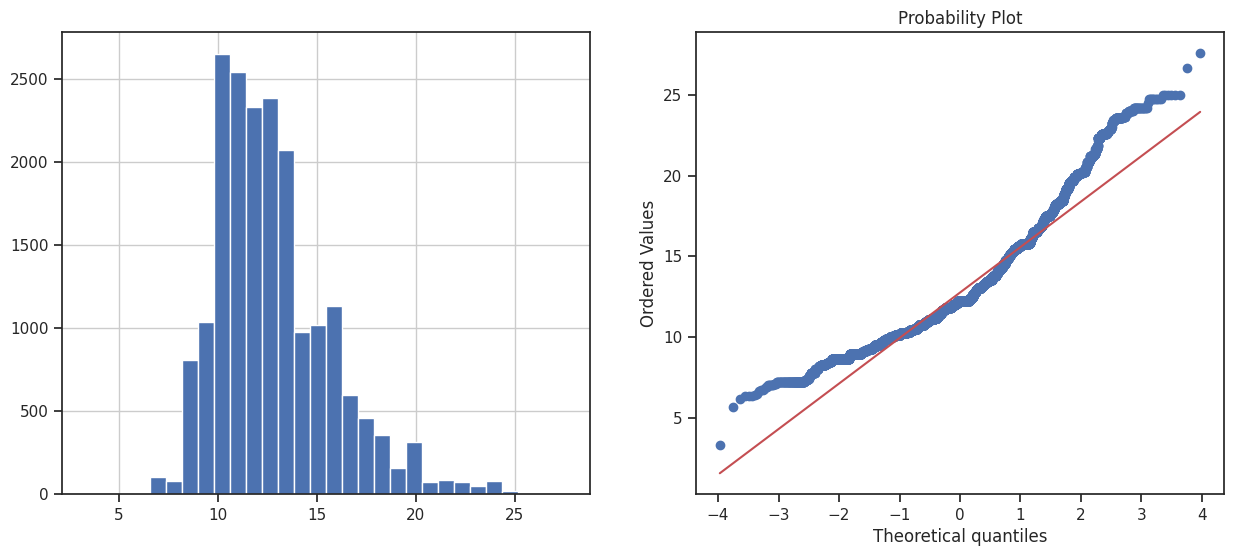

In [ ]:
data['enginePower_sqr'] = data['enginePower']**(1/2)
diagnostic_plots(data, 'enginePower_sqr')

### Возведение в степень

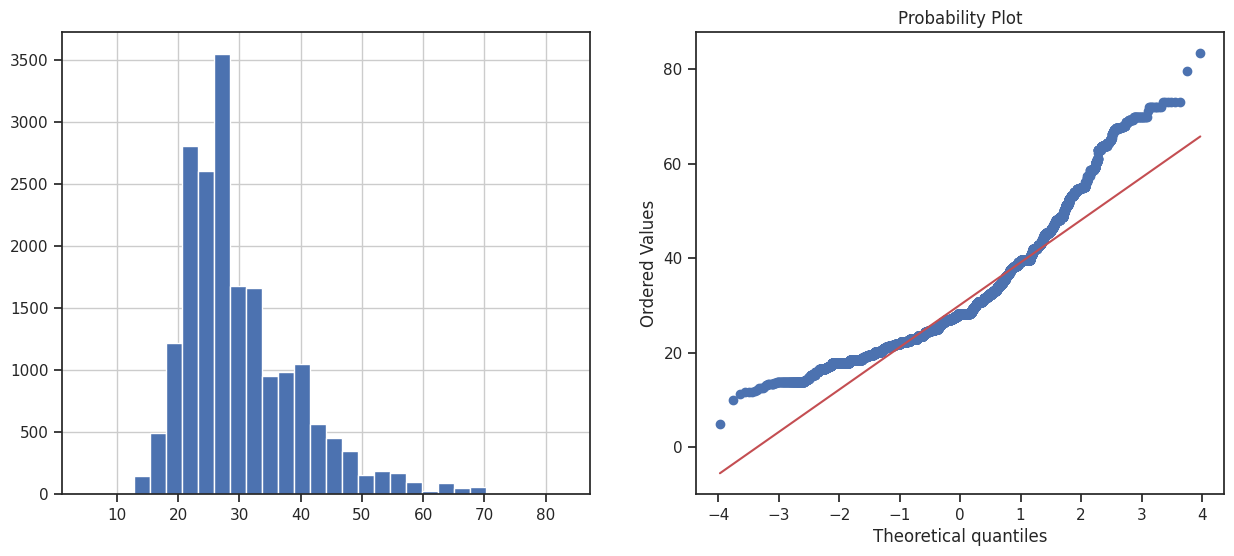

In [ ]:
data['enginePower_exp'] = data['enginePower']**(1/1.5)
diagnostic_plots(data, 'enginePower_exp')

### Преобразование Бокса-Кокса

Оптимальное значение λ = -0.3190931185432992


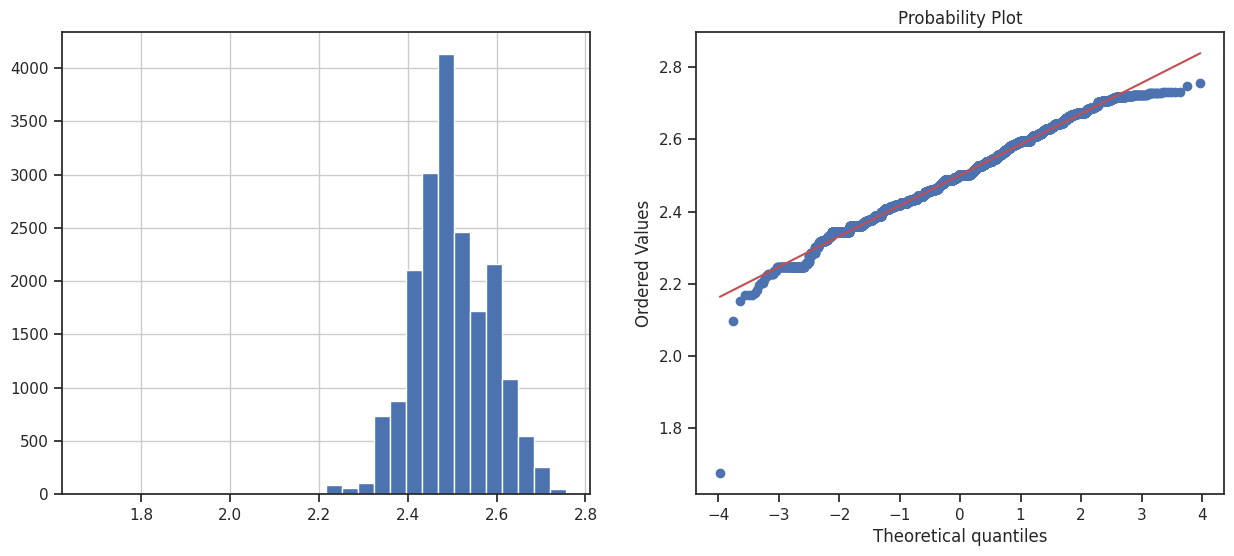

In [ ]:
data['enginePower_cox'], param = stats.boxcox(data['enginePower'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'enginePower_cox')

### Преобразование Йео-Джонсона

Оптимальное значение λ = -0.3298709817155117


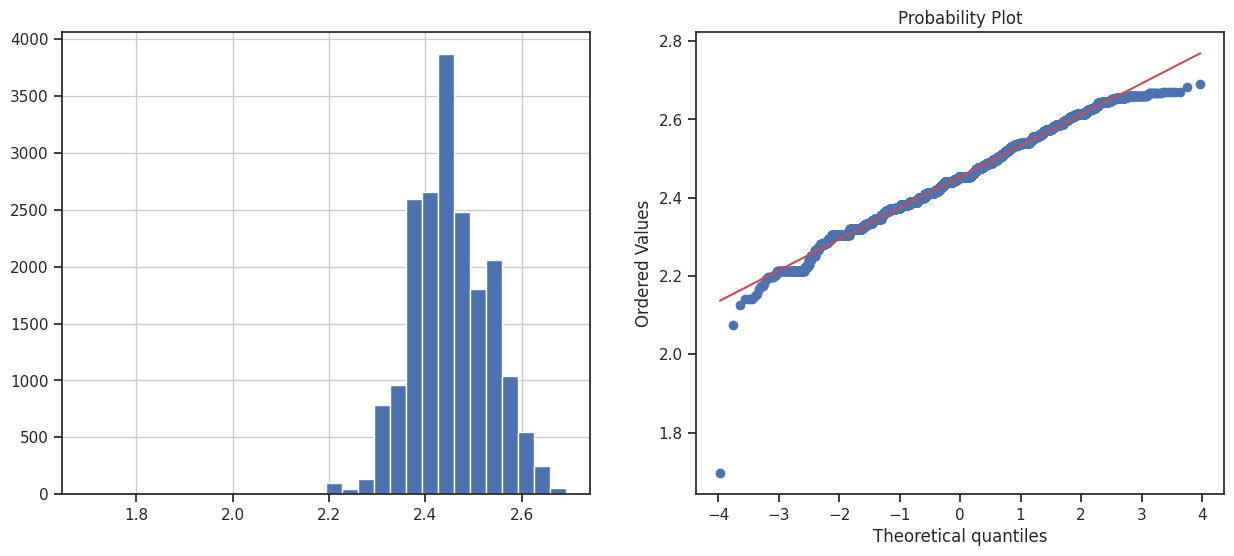

In [ ]:
# Необходимо преобразовать данные к действительному типу
data['enginePower'] = data['enginePower'].astype('float')
data['enginePower_yeojohnson'], param = stats.yeojohnson(data['enginePower'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'enginePower_yeojohnson')